[INFO] loading model...
[INFO] computing object detections...


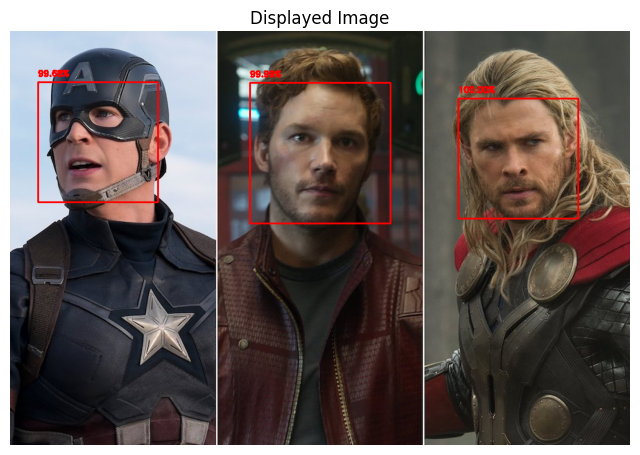

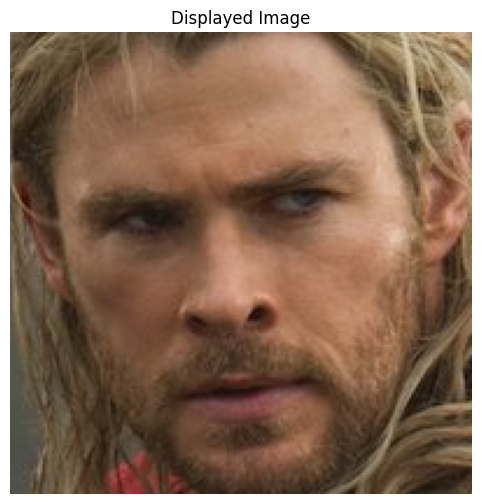

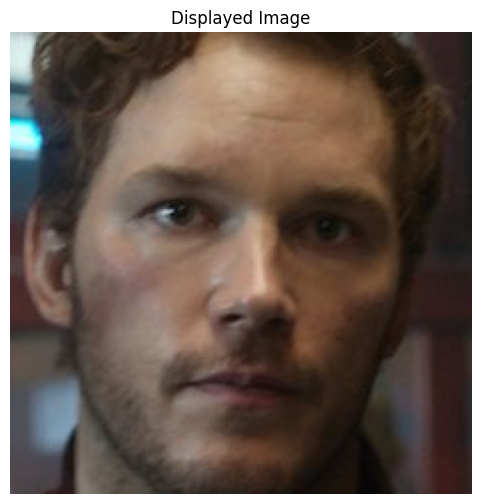

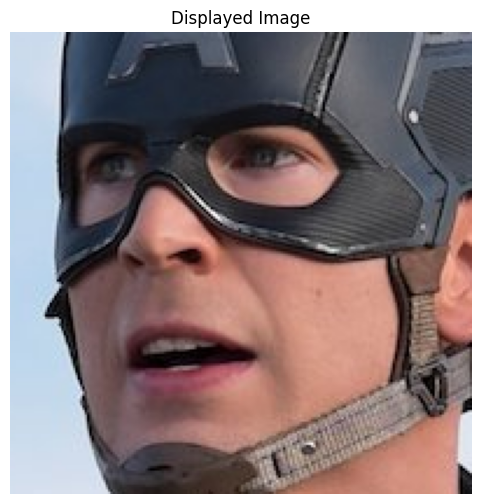

In [12]:
# import the necessary packages
import numpy as np
import argparse
import cv2
from matplotlib import pyplot as plt


prototxt = "deploy.prototxt.txt"
model = "res10_300x300_ssd_iter_140000.caffemodel"
image = "rooster.jpg"
conf = 0.5 #confidence

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, model)

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(image)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))

# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()
# loop over the detections
cropped_images = []  # List to store cropped images
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence > conf:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")

		# Compute the center of the bounding box
		centerX = (startX + endX) // 2
		centerY = (startY + endY) // 2

		# Calculate the side length of the square bounding box
		box_size = max(endX - startX, endY - startY)  # Max dimension

		# Recalculate start and end coordinates to make the bounding box square
		startX = max(0, centerX - box_size // 2)
		startY = max(0, centerY - box_size // 2)
		endX = min(w, centerX + box_size // 2)
		endY = min(h, centerY + box_size // 2)
		
        # Crop the detected face
		cropped_face = image[startY:endY, startX:endX]
		cropped_images.append(cropped_face.copy())
	
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)


# Convert the image from BGR (OpenCV format) to RGB (matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")  # Hide axes for better viewing
plt.title("Displayed Image")
plt.show()


for img in cropped_images:
    # Convert the image from BGR (OpenCV format) to RGB (matplotlib format)
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis("off")  # Hide axes for better viewing
    plt.title("Displayed Image")
    plt.show()